In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Benchmark results

Tested on AWS EC2 c6i.large instance.

In [2]:
delay = pd.read_json('results/delay.jsonl', lines=True)
delay


,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,63.76,1275.18,15.05,15.68,20.64,16.41,1,5,0,10.024213,0.5,0.5
1,63.30,1265.95,15.21,15.79,18.32,16.41,2,5,0,10.032264,0.5,0.5
2,39.03,780.61,25.07,25.61,32.89,26.20,1,10,0,10.036025,0.5,0.5
3,38.34,766.74,25.35,26.08,35.21,27.17,2,10,0,10.034453,0.5,0.5
4,28.04,560.81,35.14,35.65,39.72,36.24,1,15,0,10.040053,0.5,0.5
5,27.97,559.48,35.10,35.74,37.52,36.24,2,15,0,10.027078,0.5,0.5
6,21.92,438.33,45.16,45.61,46.82,45.79,1,20,0,10.056829,0.5,0.5
7,21.74,434.81,45.31,45.98,52.62,46.63,2,20,0,10.045776,0.5,0.5
8,17.83,356.68,55.39,56.05,59.95,56.84,1,25,0,10.055949,0.5,0.5
9,17.70,353.99,55.43,56.48,64.99,58.92,2,25,0,10.075479,0.5,0.5


Text(0, 0.5, 'transactions per second')

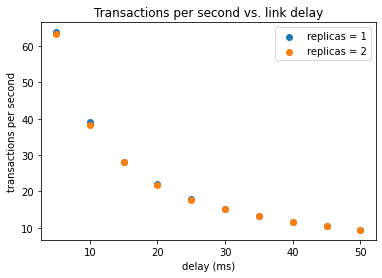

In [3]:
plt.title('Transactions per second vs. link delay')
plt.scatter(delay[delay['replicas'] == 1]['delay'], delay[delay['replicas'] == 1]['transactions_per_second'])
plt.scatter(delay[delay['replicas'] == 2]['delay'], delay[delay['replicas'] == 2]['transactions_per_second'])
plt.legend(['replicas = 1', 'replicas = 2'])
plt.xlabel('delay (ms)')
plt.ylabel('transactions per second')

In [4]:
primary_cpu = pd.read_json('results/primary_cpu.jsonl', lines=True)
primary_cpu


,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,98.66,1973.22,4.99,10.13,68.23,51.94,1,0,0,10.032565,0.1,0.5
1,179.41,3588.10,5.01,5.57,12.53,6.21,1,0,0,10.023819,0.2,0.5
2,177.23,3544.70,5.02,5.64,15.02,6.32,1,0,0,10.021409,0.3,0.5
3,178.44,3568.72,5.00,5.60,10.93,6.32,1,0,0,10.021925,0.4,0.5
4,183.71,3674.17,4.99,5.44,16.16,5.88,1,0,0,10.024400,0.5,0.5


Text(0, 0.5, 'transactions per second')

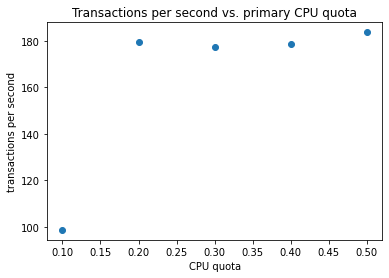

In [5]:
plt.title('Transactions per second vs. primary CPU quota')
plt.scatter(primary_cpu['primary_cpu'], primary_cpu['transactions_per_second'])

plt.xlabel('CPU quota')
plt.ylabel('transactions per second')

In [6]:
replica_cpu = pd.read_json('results/replica_cpu.jsonl', lines=True)
replica_cpu

,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,181.45,3629.08,5.00,5.51,10.34,6.09,1,0,0,10.028487,0.5,0.1
1,178.56,3571.11,5.01,5.60,14.34,6.09,1,0,0,10.026756,0.5,0.2
2,183.55,3671.06,5.02,5.45,11.84,5.88,1,0,0,10.020843,0.5,0.3
3,184.18,3683.68,4.99,5.43,19.91,5.77,1,0,0,10.024039,0.5,0.4
4,180.83,3616.58,5.05,5.53,11.49,6.09,1,0,0,10.022777,0.5,0.5


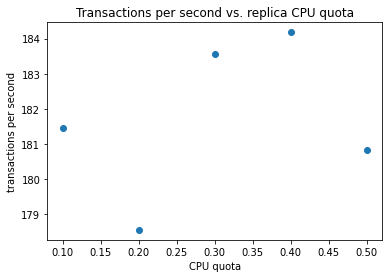

In [7]:
plt.title('Transactions per second vs. replica CPU quota')
plt.scatter(replica_cpu['replica_cpu'], replica_cpu['transactions_per_second'])

plt.xlabel('CPU quota')
plt.ylabel('transactions per second')
plt.show()

In [8]:
replicas = pd.read_json('results/replicas.jsonl', lines=True)
replicas

,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,183.36,3667.14,4.99,5.45,14.71,5.88,1,0,0,10.021746,0.5,0.5
1,178.62,3572.41,5.14,5.60,11.18,5.99,2,0,0,10.022369,0.5,0.5
2,172.59,3451.82,5.23,5.79,12.55,6.43,3,0,0,10.024004,0.5,0.5
3,170.57,3411.43,5.35,5.86,12.00,6.43,4,0,0,10.098292,0.5,0.5


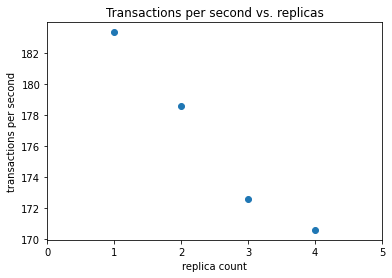

In [9]:
plt.title('Transactions per second vs. replicas')
plt.scatter(replicas['replicas'], replicas['transactions_per_second'])

plt.xlabel('replica count')
plt.xticks(np.arange(0, 6))
plt.ylabel('transactions per second')
plt.show()

Text(0, 0.5, 'latency (ms)')

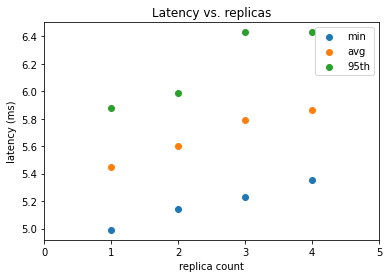

In [10]:
plt.title("Latency vs. replicas")
plt.scatter(replicas['replicas'], replicas['latency_min'])
plt.scatter(replicas['replicas'], replicas['latency_avg'])
plt.scatter(replicas['replicas'], replicas['latency_95th'])
plt.legend(['min', 'avg', '95th'])
plt.xlabel('replica count')
plt.xticks(np.arange(0, 6))
plt.ylabel('latency (ms)')